In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [2]:
df = pd.read_csv('../data/passcoverage.csv')

In [3]:
df.head()

,Rk,Player,Tm,Age,Pos,G,GS,Int,Tgt,Cmp,...,YAC,Bltz,Hrry,QBKD,Sk,Prss,Comb,MTkl,MTkl%,-9999
0,1,Foyesade Oluokun,JAX,27,LB,17,17,0,90,71,...,374,39,0,7,2.0,9,184,10,5.20%,OluoFo00
1,2,Nick Bolton,KAN,22,LB,17,17,2,74,61,...,366,37,1,4,2.0,7,180,7,3.70%,BoltNi00
2,3,Jordyn Brooks,SEA,25,LB,16,16,0,75,54,...,495,17,3,2,1.0,6,161,11,6.40%,BrooJo01
3,4,Roquan Smith*+,2TM,25,LB,17,17,3,69,49,...,266,32,5,0,4.5,10,169,8,4.50%,SmitRo07
4,5,Zaire Franklin,IND,26,LB,17,17,0,73,55,...,357,28,0,2,3.0,6,167,17,9.20%,FranZa00


In [4]:
df = df[df['Pos'].isin(['CB', 'S', 'SS', 'FS', 'DB/S', 'CB/DB'])]

In [5]:
df = df[df['Tgt'] > 70]

In [6]:
df = df[['Player', 'Tm', 'Tgt', 'Cmp%', 'DADOT']]

In [7]:
df['Player'] = df['Player'].replace('[^a-zA-Z0-9\s-]', '', regex=True)

In [8]:
teams = nfl.import_team_desc()

In [9]:
df['Tm'] = df['Tm'].replace(
    {'KAN': 'KC', 'GNB': 'GB', 'SFO': 'SF', 'NOR': 'NO', 'TAM': 'TB', 'LVR': 'LV', 'NWE': 'NE'})

In [10]:
# Merge onto teams
df = df.merge(teams, left_on='Tm', right_on='team_abbr', how='left')

In [11]:
df['Cmp%'] = df['Cmp%'].astype(str).str.replace('%', '').astype(float)

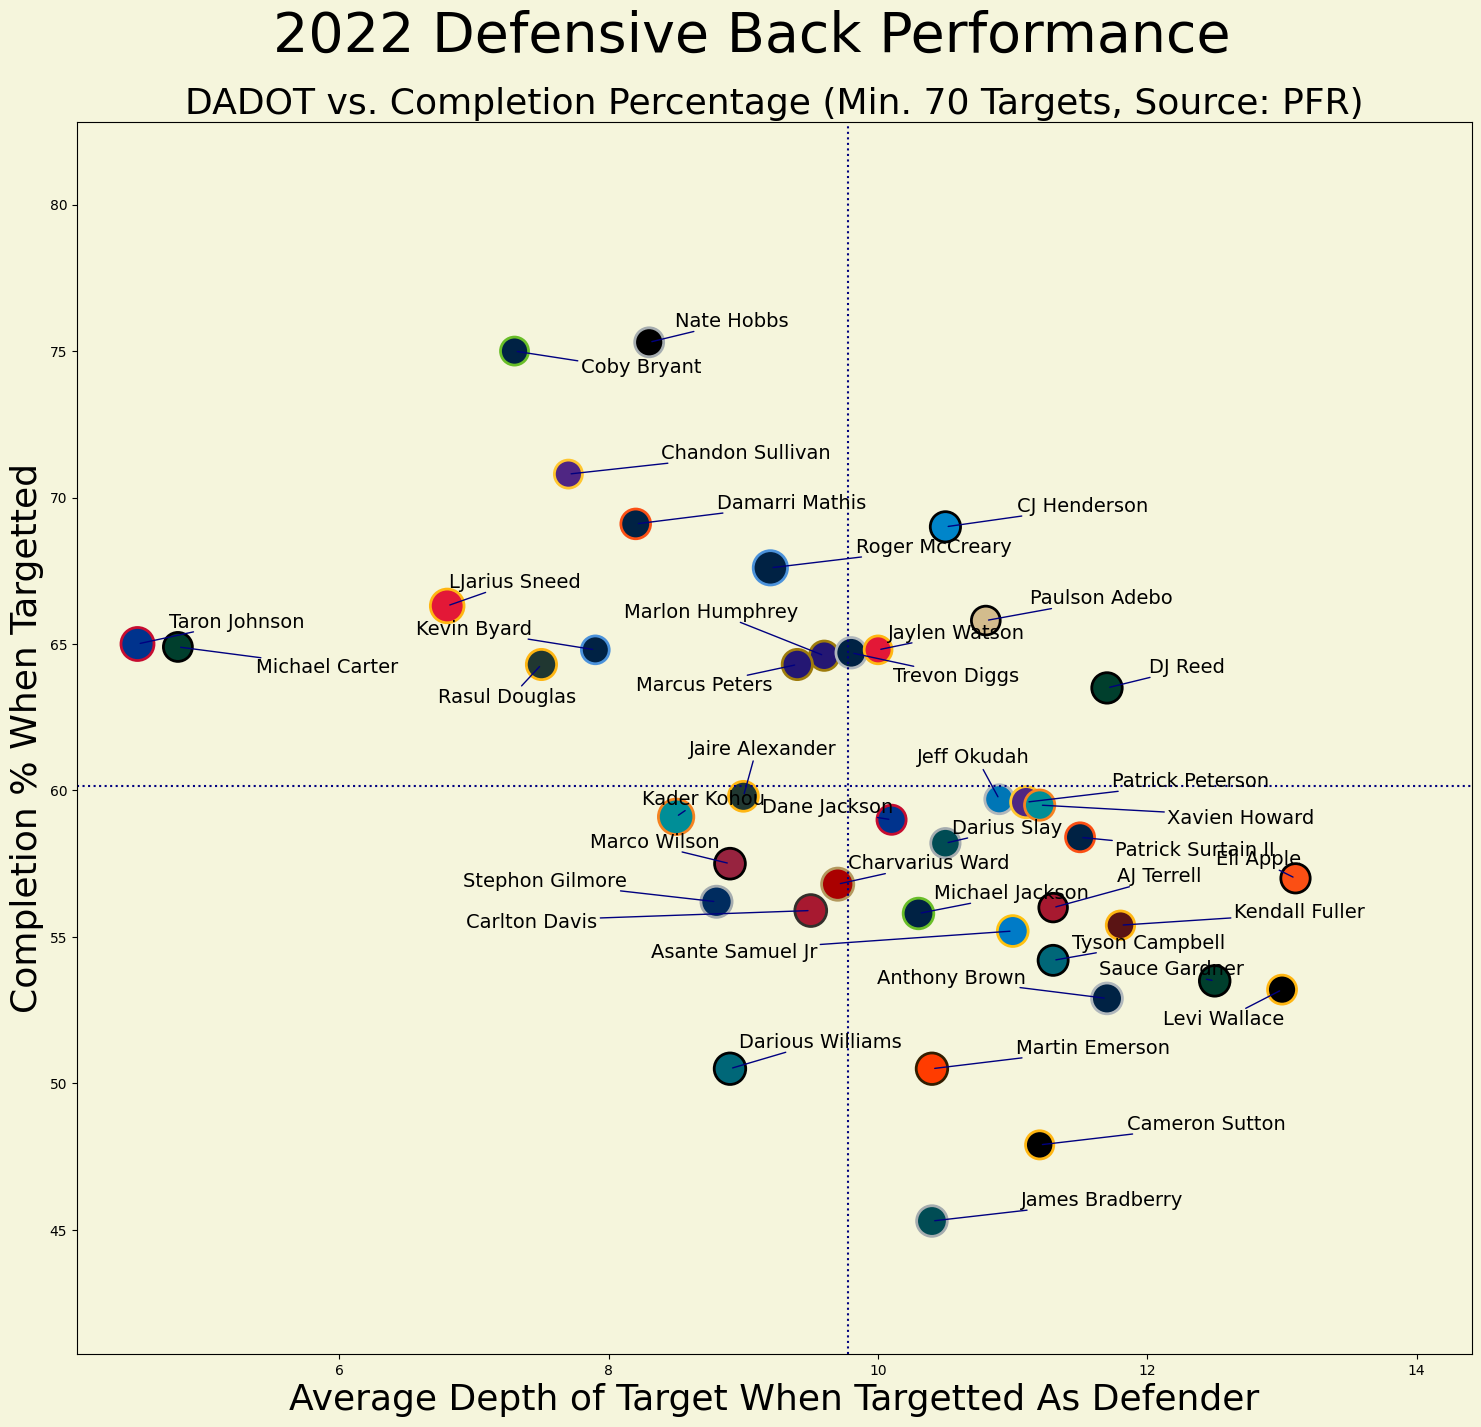

In [26]:
fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = df['Tgt'] / max(df['Tgt']) * 650
scatter = ax.scatter(df['DADOT'], df['Cmp%'], c=df['team_color'],
                     s=point_size, edgecolor=df['team_color2'], linewidth=2)

texts = []
for x0, y0, player in zip(df['DADOT'], df['Cmp%'], df['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=14))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (2.2, 2.5),
    'expand_text': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2022 Defensive Back Performance",
             fontsize=40, y=0.95, ha='center')
plt.title("DADOT vs. Completion Percentage (Min. 70 Targets, Source: PFR)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('Average Depth of Target When Targetted As Defender', fontsize=26)
plt.ylabel('Completion % When Targetted', fontsize=26)

# make the axes limits +10% of the max value
x_max = df['DADOT'].max()
y_max = df['Cmp%'].max()

# make the axes minimums -10% of the max value
x_min = df['DADOT'].min()
y_min = df['Cmp%'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Draw horizontal and vertical lines at the mean of each axis
mean_y = df['Cmp%'].mean()
mean_x = df['DADOT'].mean()

plt.axhline(mean_y, color='navy', linestyle='dotted')
plt.axvline(mean_x, color='navy', linestyle='dotted')

# Save the plot as a high-quality image
plt.savefig('../images/advanced_dbs.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()